# Project: Fern

In [25]:
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import random as random
%matplotlib inline
sns.set()

https://en.wikipedia.org/wiki/Barnsley_fern

#### Method - 1: Blind implementation 

In [30]:
import random as random
x = 0
y = 0
X = [x]
Y = [y]
n=1

isprint = False

while n < 1000000:
    
    r = random.uniform(0,100)
    
    if r <  1.0:
        x = 0
        y = 0.16*Y[n-1]
        
        X.append(x) ; Y.append(y)
        
    elif r > 1.0 and r < 86.0:
        x = 0.85*X[n-1] + 0.04*Y[n-1]
        y = -0.04*X[n-1] + 0.85*Y[n-1]+1.6
        X.append(x);Y.append(y)
    elif r > 86.0 and r < 93.0:
        x = 0.2*X[n-1] - 0.26*Y[n-1]
        y = 0.23*X[n-1] + 0.22*Y[n-1] + 1.6
        
        X.append(x);Y.append(y)
        
    elif r > 93.0 and r < 100.0:
        x = -0.15*X[n-1] + 0.28*Y[n-1]
        y = 0.26*X[n-1] + 0.24*Y[n-1] + 0.44
        
        X.append(x);Y.append(y)
        
    if isprint:
        print("step: ",n,"random number is: ", r, "coordinate is : ", x,y)
        
    n = n+1
    

In [31]:
#for i in range(len(X)):
#    print(X[i],Y[i])

In [32]:
with open ('data/fern.json', 'w')as f1:
    json.dump([X,Y],f1)

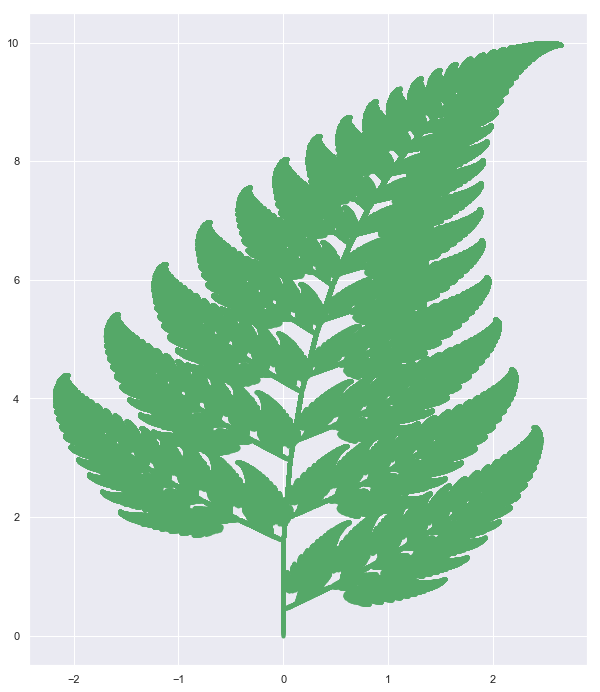

In [33]:
plt.figure(figsize = [10,12])
plt.scatter(X,Y,color = 'g',marker = '.')
plt.savefig('plot/charge-lattice.png')  
plt.savefig('plot/charge-lattice.pdf') 
plt.show()

#### Method-2 : Manual Matrix Multiplication

These correspond to the following transformations:

$ {\displaystyle f_{1}(x,y)={\begin{bmatrix}\ 0.00&\ 0.00\ \\0.00&\ 0.16\end{bmatrix}}{\begin{bmatrix}\ x\\y\end{bmatrix}}}$

${\displaystyle f_{2}(x,y)={\begin{bmatrix}\ 0.85&\ 0.04\ \\-0.04&\ 0.85\end{bmatrix}}{\begin{bmatrix}\ x\\y\end{bmatrix}}+{\begin{bmatrix}\ 0.00\\1.60\end{bmatrix}}}$

$ {\displaystyle f_{3}(x,y)={\begin{bmatrix}\ 0.20&\ -0.26\ \\0.23&\ 0.22\end{bmatrix}}{\begin{bmatrix}\ x\\y\end{bmatrix}}+{\begin{bmatrix}\ 0.00\\1.60\end{bmatrix}}}$

${\displaystyle f_{4}(x,y)={\begin{bmatrix}\ -0.15&\ 0.28\ \\0.26&\ 0.24\end{bmatrix}}{\begin{bmatrix}\ x\\y\end{bmatrix}}+{\begin{bmatrix}\ 0.00\\0.44\end{bmatrix}}}$

In [41]:
ITR = 100000

In [42]:
x = np.array([[0.0,0.0] for k in range(ITR)])
A = np.array([[0.0,0.0],[0.0,0.16]])
B = np.array([[0.85,0.04],[-0.04,0.85]])
C = np.array([[0.20,-0.26],[0.23,0.22]])
D = np.array([[-0.15,0.28],[0.26,0.24]])
AD = np.array([[0.0,0.0],
             [0.0,1.6],
             [0.0,1.6],
             [0.0,0.44]])

---------

In [43]:
X =[]
Y = []

x[0,0] = 0.0
x[0,1] = 0.0

t = 0

while t < ITR:
    
    ct = random.uniform(0,100)
    
    '''First condition'''
    if ct < 1.0:       
        for p in range(2):
            x[t,p] = 0.0
            for q in range(2):
                x[t,p] = x[t,p] + A[p,q]*x[t-1,q]
                
                
        '''second condition'''            
    elif ct > 1.0 and ct < 86.0:
        for p  in range(2):
            x[t,p] = 0.0
            for q in range(2):
                x[t,p] = x[t,p] + B[p,q]*x[t-1,q]
                       
        for  p in range(2):
            x[t,p] = x[t,p]  + AD[1,p]
            
            
        '''third condition'''                 
    elif ct > 86.0 and ct < 93.0:
        for p  in range(2):
            x[t,p] = 0.0
            for q  in range(2):
                x[t,p] = x[t,p] + C[p,q]*x[t-1,q]
                      
                       
        for p in range(2):
            x[t,p] = x[t,p]  + AD[2,p]
            
        '''fourth condition '''                 
    elif  ct > 93.0 and ct < 100.0:
        for p in range(2):
            x[1,p] = 0.0
            for q  in range(2):
                x[t,p] = x[t,p] + D[p,q]*x[t-1,q]
                     
                       
        for p in range(2):
            x[t,p] = x[t,p]  + AD[3,p]
                     
                 


    X.append(x[t,0])
    Y.append(x[t,1])
    t = t +1

                      

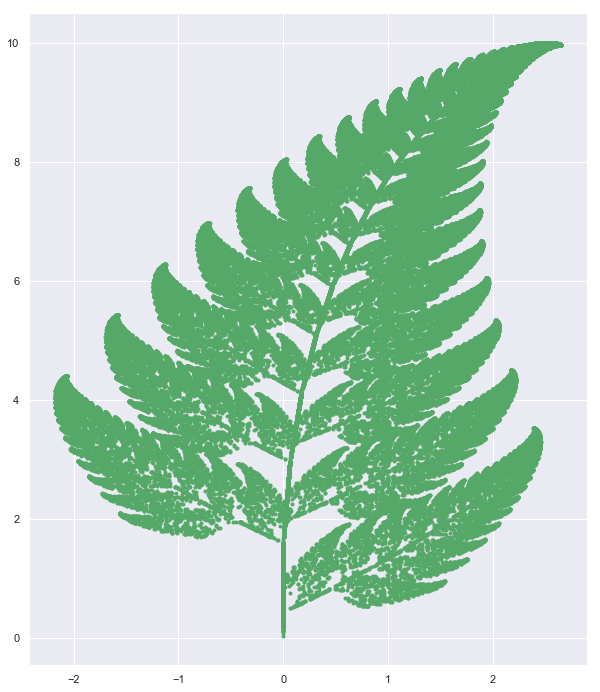

In [44]:
plt.figure(figsize = [10,12])
plt.scatter(X,Y,color = 'g',marker = '.')
plt.savefig('plot/fern.pdf')    
plt.show()

### Method 3-Numpy

In [45]:
'''Matrices'''
A = np.array([[0.0,0.0],[0.0,0.16]])
B = np.array([[0.85,0.04],[-0.04,0.85]])
C = np.array([[0.20,-0.26],[0.23,0.22]])
D = np.array([[-0.15,0.28],[0.26,0.24]])
AD = np.array([[0.0,0.0],
             [0.0,1.6],
             [0.0,1.6],
             [0.0,0.44]])

In [46]:
u = np.array([0,0])
U = [u]
n = 1

while n < 10000:
    
    '''generate a random number'''
    r = random.uniform(0,100)
    
    
    '''1rst condition'''
    if r <  1.0:
        u = np.dot(A,u)
        U.append(u)
        
        
        '''second condition'''
    elif r > 1.0 and r < 86.0:
        u = np.dot(B,u) + AD[1]
        U.append(u)
        
        
        '''third condition'''
    elif r > 86.0 and r < 93.0:
        u = np.dot(C,u) + AD[2]
        U.append(u)
        
        
        '''fourth condition'''
    elif r > 93.0 and r < 100.0:
        u = np.dot(D,u) + AD[3]
        U.append(u)
        
        
    '''update n'''    
    n = n+1
    

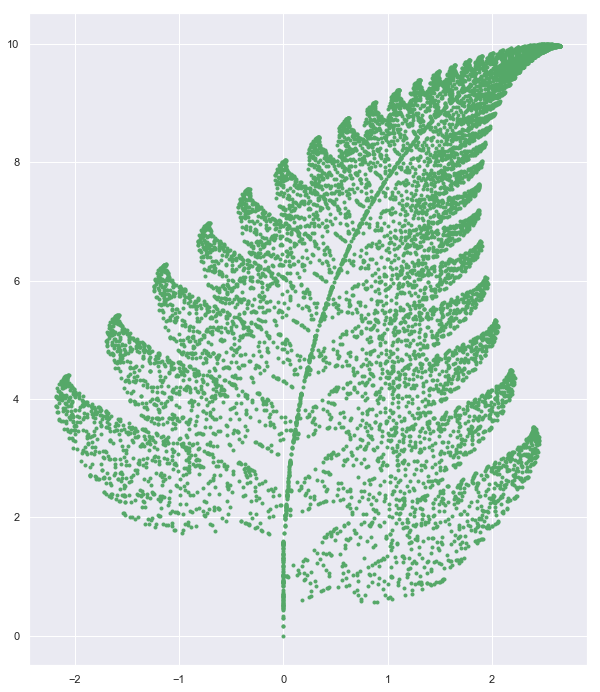

In [47]:
plt.figure(figsize = [10,12])
for item in U:
    plt.scatter(item[0],item[1],color = 'g',marker = '.')
plt.show()